In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('housing.data',delim_whitespace=True,header=None)

In [7]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
input_df = df.drop(['MEDV'],axis=1)

In [28]:
X = input_df.values

In [29]:
y = df[['MEDV']].values

In [25]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
result = pd.DataFrame(list(zip(model.coef_.flatten(),col_name)),columns = ['Coefficient','Name']).set_index('Name')
np.abs(result).sort_values(by='Coefficient')

,Coefficient
Name,
AGE,0.000692
B,0.009312
TAX,0.012335
INDUS,0.020559
ZN,0.046420
CRIM,0.108011
RAD,0.306049
LSTAT,0.524758
PTRATIO,0.952747


In [62]:
from sklearn.metrics import r2_score

In [63]:
benchmark = model.predict(X)

In [65]:
r2_score(y,benchmark)

0.7406426641094095

In [67]:
new_X = df.drop(['MEDV','LSTAT'],axis=1).values

In [70]:
lr_model = LinearRegression()
lr_model.fit(new_X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
predictions = lr_model.predict(new_X)

In [73]:
r2_score(y,predictions)

0.6842042799773889

In [74]:
without_age = df.drop(['MEDV','AGE'],axis=1).values

In [75]:
lr_model2 = LinearRegression()

In [76]:
lr_model2.fit(without_age,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
without_age_predictions = lr_model2.predict(without_age)

In [78]:
r2_score(y,without_age_predictions)

0.7406412165505145

In [79]:
import seaborn as sns


ValueError: shapes (100,2) and (507,506) not aligned: 2 (dim 1) != 507 (dim 0)

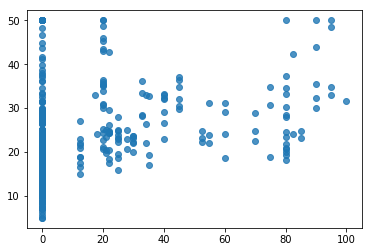

In [96]:
sns.regplot(X[:,1].reshape(1,-1),y.reshape(1,-1))

In [98]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [101]:
theta = 3
alpha = 0.1
for_plotting = []
for _ in range(10):
    result = alpha*2*theta
    for_plotting.append((theta,theta**2))
    theta = theta-result
    
    
    
    

In [102]:
for_plotting

[(3, 9),
 (2.4, 5.76),
 (1.92, 3.6864),
 (1.536, 2.359296),
 (1.2288000000000001, 1.5099494400000002),
 (0.9830400000000001, 0.9663676416000002),
 (0.7864320000000001, 0.6184752906240002),
 (0.6291456000000001, 0.3958241859993601),
 (0.5033164800000001, 0.25332747903959046),
 (0.40265318400000005, 0.1621295865853379)]

In [103]:
tmp = pd.DataFrame(for_plotting)

In [104]:
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


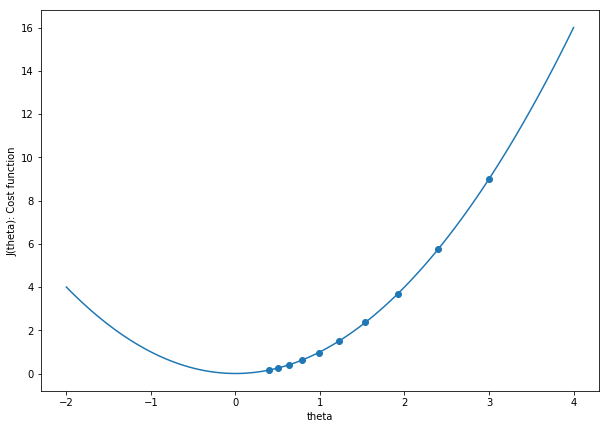

In [110]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
x = np.linspace(-2,4,100)
y = np.linspace(-2,4,100)**2
plt.scatter(tmp.iloc[:,0],tmp.iloc[:,1])
plt.plot(x,y)
plt.xlabel('theta')
plt.ylabel('J(theta): Cost function')
plt.show()

In [111]:
from scipy.misc import derivative


In [140]:
def cost_function(x):
    return np.sin(x)

In [141]:
theta = 3
alpha = 0.1
for_plotting = []
for _ in range(10):
    result = alpha*derivative(cost_function, theta, order = 5)
    theta = theta - result
    for_plotting.append((theta,cost_function(theta)))
for_plotting

[(3.0960700343133154, 0.04550689808427111),
 (3.1930106762274195, -0.051395369025870115),
 (3.289923599319652, -0.14778761250199768),
 (3.385899176116242, -0.24188349813737492),
 (3.4800587416608892, -0.3320405977519704),
 (3.5715942941586993, -0.4168722936495954),
 (3.659801331442152, -0.49532479775542654),
 (3.744101762135617, -0.5667115504787894),
 (3.8240555643304885, -0.6307062071769616),
 (3.8993616213833615, -0.6873025994135975)]

In [142]:
tmp = pd.DataFrame(for_plotting)

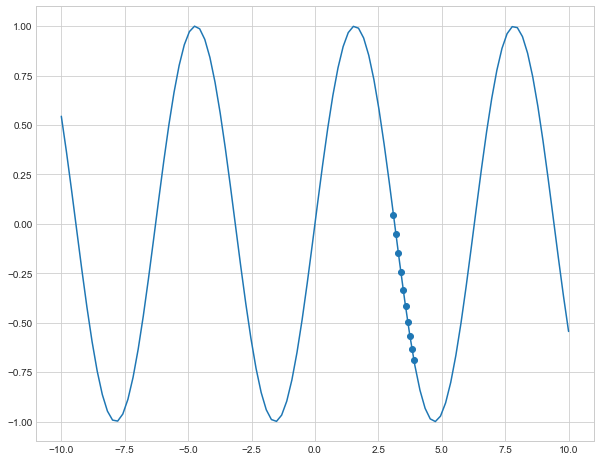

In [143]:
import seaborn as sns
x = np.linspace(-10,10,100)
y = list(map(cost_function,x.tolist()))
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.scatter(tmp.iloc[:,0],tmp.iloc[:,1])
plt.plot(x,y)
plt.show()

In [133]:
del p

4.0